## 통계적 추정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3

'%.3f'

In [5]:
df = pd.read_csv('ch4_scores400.csv')
df.head()

,score
0,76
1,55
2,80
3,80
4,74


In [8]:
scores = np.array(df['score'])
scores[:5]

array([76, 55, 80, 80, 74], dtype=int64)

In [9]:
# 모집단의 평균, 분산

p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

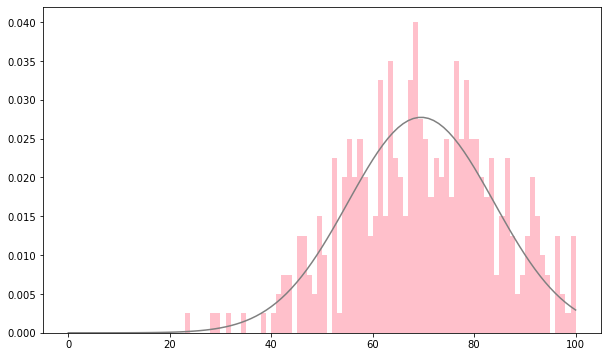

In [14]:
# 모집단의 분포 살펴보기
# 정규분포를 이룬다고 가정하여 추정하기

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))

ax.plot(xs, rv.pdf(xs), color = 'gray')
ax.hist(scores, bins = 100, range =(0,100), density = True, color = 'pink')

plt.show()

### 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 함
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 불편성임
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있음


In [15]:
# 무작위추출한 20명의 표본 추출

np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [18]:
# 무작위추출한 20명의 표본을 1만개 추출

np.random.seed(1111)
n_sample = 10000
samples = np.random.choice(scores, (n_sample, n))

In [30]:
# 5개의 표본을 뽑아 평균 확인해보기

for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean}')

1번째 표본평균: 67.0
2번째 표본평균: 72.85
3번째 표본평균: 69.2
4번째 표본평균: 64.45
5번째 표본평균: 72.65


In [31]:
# 표본크기가 20인 1만개 표본의 기댓값 확인해보기

sample_means = np.mean(samples, axis = 1)
np.mean(sample_means)

69.538

In [32]:
# 표본 크기 n이 100만개일 때 기댓값 확인해보기

samples2 = np.random.choice(scores, int(1e6))
np.mean(samples2)

69.547

In [34]:
# 5개의 표본을 뽑아 분산 확인해보기

for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 116.800
2번째 표본분산: 162.928
3번째 표본분산: 187.060
4번째 표본분산: 149.148
5번째 표본분산: 111.528


In [38]:
# 표본크기가 20인 1만개 표본의 분산 확인해보기

sample_vars = np.var(samples, axis = 1)
np.mean(sample_vars)

196.344

In [40]:
# 표본크기가 20인 1만개 표본의 '불편'분산 확인해보기

samples_u_vars = np.var(samples, axis = 1, ddof = 1)
np.mean(samples_u_vars)

206.678

In [41]:
# 표본 크기 n이 100만개일 때 '불편'분산 확인해보기

np.var(np.random.choice(scores, int(1e6)), ddof = 1)

206.657

In [43]:
u_var = np.var(sample, ddof = 1)
u_var

158.253

### 구간추정

- 구간추정을 100번 하더라도 모평균은 실제 값이 하나로 정해져있기 때문에 
- 신뢰구간 95%의 뜻은 <b>'동일한 방법으로 수차례 표본추출하여 구간추정을 하면 그 중 95%의 구간추정에는 모평균이 포함되어 있다'</b>임

In [47]:
%precision 3

'%.3f'

In [48]:
import pandas as pd
import numpy as np

df = pd.read_csv('ch4_scores400.csv')
scores = np.array(df['score'])

# 모집단의 평균, 분산
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

In [49]:
np.random.seed(0)


# 표본 수가 20개
n = 20
sample = np.random.choice(scores, n)
s_mean = np.mean(sample)


# 표본 집단 수가 10000개
samples = np.random.choice(scores, (10000, n))


# 표본 수가 1000000개
samples2 = np.random.choice(scores, int(1e6))

In [50]:
from scipy import stats

rv = stats.norm()
lcl = s_mean - rv.isf(0.025)*np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(p_var/n)

lcl, ucl

(64.100, 76.700)

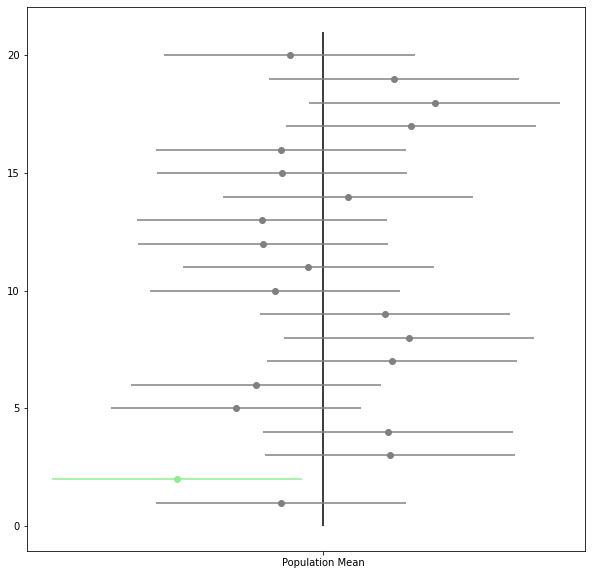

In [51]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21, color = 'black')

for i in range(n_samples):
    sample_ = samples[i+20]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025)*np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975)*np.sqrt(p_var/n)
    
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color = 'gray')
        ax.hlines(n_samples-i, lcl, ucl, color = 'gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color = 'lightgreen')
        ax.hlines(n_samples-i, lcl, ucl, color = 'lightgreen')
    
    ax.set_xticks([p_mean])
    ax.set_xticklabels(['Population Mean'])

plt.show()

- 20번 중 1번 모평균을 포함하지 않는 구간추정이 수행됨 -> 95% 신뢰구간의 이미지임

In [52]:
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    
    if lcl <= p_mean <= ucl:
        cnt += 1
        
cnt / len(samples)

0.949

- 신뢰구간의 약 95%가 모평균을 포함하고 있음

#### 정규분포의 모분산 구간추정
- 모집단으로 정규분포를 가정하고, 모평균은 모르는 상태일 때, 
Y = (n-1)s^2/σ^2  ~ X^2(n-1)

In [53]:
# 1만개의 X 표본데이터를 가지고  Y의 표본 데이터 생성

samples_u_vars = np.var(samples, axis = 1, ddof = 1)  # 불편분산

sample_y = samples_u_vars * (n-1) / p_var
sample_y

array([17.501, 22.143, 21.701, ..., 24.744, 14.681, 17.892])

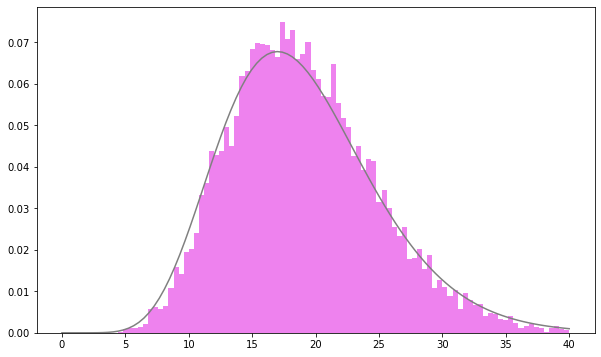

In [54]:
# Y의 표본 데이터 히스토그램, X^2(n-1) 밀도함수 그리기

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)


n = 20
xs = np.linspace(0, 40, 100)

# X^2(n-1) 밀도함수 그리기
rv = stats.chi2(df = n-1)
ax.plot(xs, rv.pdf(xs), color = 'gray')

# Y의 표본 데이터 히스토그램
hist, _, _ = ax.hist(sample_y, bins = 100, range = (0,40), density = True, color = 'violet')

In [55]:
# 모분산의 신뢰구간 구하기

u_var = np.var(sample, ddof = 1)
rv = stats.chi2(df = n-1)


lcl = (n-1) * u_var / rv.isf(0.025)
ucl = (n-1) * u_var / rv.isf(0.975)

lcl, ucl

(91.525, 337.596)

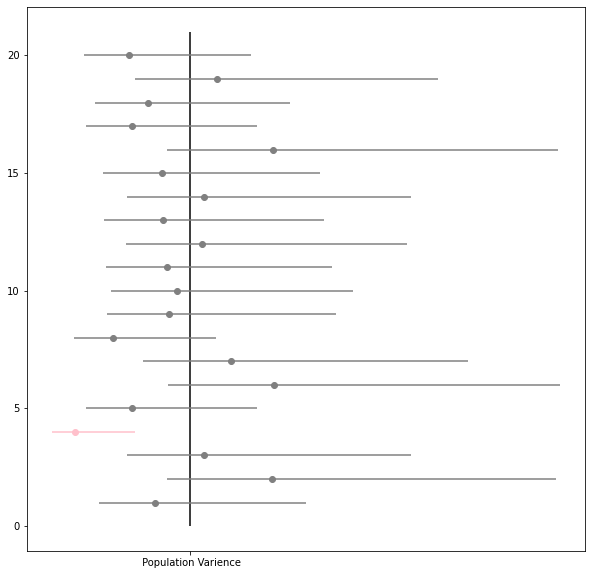

In [56]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

n = 20

rv = stats.chi2(df = n-1)

ax.vlines(p_var, 0, 21, color = 'black')

for i in range(20):
    sample_ = samples[20 + i]
    u_var_ = np.var(sample_, ddof = 1)
    
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, 20-i, color = 'gray')
        ax.hlines(20-i, lcl, ucl, color = 'gray')
    else:
        ax.scatter(u_var_, 20-i, color = 'pink')
        ax.hlines(20-i, lcl, ucl, color = 'pink')

ax.set_xticks([p_var])
ax.set_xticklabels([' Population Varience'])

plt.show()

In [57]:
rv = stats.chi2(df = n-1)

cnt = 0

for sample_ in samples:
    u_var_ = np.var(sample_, ddof = 1)
    
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    
    if lcl <= p_var <= ucl:
        cnt += 1
    
cnt / len(samples)

0.962

- 신뢰구간의 약 96%가 모분산을 포함하고 있음을 확인할 수 있음

#### 정규분포의 모평균 구간추정: 모분산을 모르는 경우
- 모분산을 알지 못하는 상황에서는 표준오차를 불편분산을 사용해서 구함

In [58]:
rv = stats.t(df = n-1)

lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(64.512, 76.288)

#### 베르누이분포의 모평균 구간추정

In [59]:
# 자료 불러오기
## 1. 상품 A를 알고 있음, 0. 상품 A를 알지 못함 

enquete_df = pd.read_csv('ch10_enquete.csv')
display(enquete_df.head())


# 데이터프레임 -> 배열화

enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

,known
0,1
1,0
2,1
3,1
4,1


array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [62]:
## X ~ Bern(p)

## 평균(p) 구하기 
s_mean = enquete.mean()
print(f'평균(p): {s_mean}')


## 신뢰구간 구하기
rv = stats.norm()

lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean * (1 - s_mean)/len(enquete))
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean * (1 - s_mean)/len(enquete))

lcl, ucl

평균(p): 0.709


(0.681, 0.737)

#### 포아송분포의 모평균 구간추정

In [65]:
# 자료 불러오기
## 사이트에 대한 1시간당 액세스 수가 72시간 분량이 들어있음

n_access_df= pd.read_csv('ch10_access.csv')
display(n_access_df.head())


# 데이터프레임 -> 배열화

n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

,access number
0,10
1,11
2,9
3,9
4,18


array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [69]:
# λ(1시간당 평균 액세스 수) 구하기

s_mean = n_access.mean()
print(f'평균: {s_mean: .3f}')


# 신뢰구간 구하기
rv = stats.norm()

lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

평균:  10.444


(9.698, 11.191)

#### 과제1: 다음 용어를 예를 들어 설명하기

In [86]:
# 모집단 생성

population = np.array(np.random.choice(np.arange(100, 200),2000))
population_mean = np.mean(population)
population_var = np.var(population)
print(f'모집단 평균: {population_mean:.2f}')
print(f'모집단 분산: {population_var:.2f}')

모집단 평균: 149.00
모집단 분산: 825.68


##### 1. 불편성
- 표본으로부터 구한 통계량의 기대치가 추정하려 하는 모수의 실제 값에 같거나 가까워지는 성질

In [106]:
# 표본 생성
sample = np.random.choice(population, (20,20))
sample_mean = np.mean(np.mean(sample, axis = 1))
print(f'표본의 평균:{sample_mean:.2f}')

sample = np.random.choice(population, (200,20))
sample_mean = np.mean(np.mean(sample, axis = 1))
print(f'표본의 평균:{sample_mean:.2f}')

표본의 평균:147.44
표본의 평균:149.28


##### 2. 일치성
- 표본의 수가 늘어날 수록 추정치가 모수에 가까워지려하는 특성

In [114]:
# 표본 생성
sample2 = np.random.choice(population, 500)
sample2_mean = np.mean(sample2)
print(f'표본의 평균: {sample2_mean:.2f}')

sample2 = np.random.choice(population, 5000000)
sample2_mean = np.mean(sample2)
print(f'표본의 평균: {sample2_mean:.2f}')

표본의 평균: 147.85
표본의 평균: 149.01


##### 3. 불편분산:

<img src = '불편분산설명.png' width = 800px>

In [123]:
# 모집단 분산
print(f'모집단 분산: {population_var:.2f}')



# 표본평균들(n = 20)
## 분산 
sample_var1_1 = np.var(sample, axis = 1)
print(f'표본평균의 분산:{np.mean(sample_var1_1): .2f}')

## 불편분산
sample_var1_2 = np.var(sample, axis = 1, ddof = 1) 
print(f'표본평균의 불편분산:{np.mean(sample_var1_2): .2f}')



# 표본(n = 5000000)
## 분산 
sample_var2_1 = np.var(sample2)
print(f'표본 2의 분산:{sample_var2_1: .2f}')

## 불편분산
sample_var2_2 = np.var(sample2, ddof = 1)
print(f'표본 2의 분산:{sample_var2_2: .2f}')


모집단 분산: 825.68
표본평균의 분산: 780.51
표본평균의 불편분산: 821.59
표본 2의 분산: 825.89
표본 2의 분산: 825.89


#### 과제2:
<b>카이제곱분포 구간 추정에 활용된 사례를 만들어 설명하기</b>

A 공장에서 철판 표면의 코팅 두께의 변동이 크기 않게 조절하고자 한다. 이를 위해 철판 표면 코팅 분산에 대해 추정하기 위해 9개의 샘플을 뽑아 두께를 측정하였다. 철판두께의 모분산에 대한 95% 신뢰구간은?
           두께: 19.3mm,19.5mm, 20.0mm, 20.3mm, 20.4mm, 20.8mm, 21.2mm, 21.4mm

In [127]:
thick = [19.3, 19.5, 20.0, 20.3, 20.4, 20.8, 21.2, 21.4]

# 표본(n = 8) 불편분산
u_var = np.var(thick, ddof = 1)

# 자유도가 7인 카이제곱분포
rv = stats.chi2(df = 7)

#신뢰구간
lcl = (n-1) * u_var / rv.isf(0.025)
ucl = (n-1) * u_var / rv.isf(0.975)

lcl, ucl

(2.520, 23.881)

<b> t분포가 구간 추정에 활용된 사례를 만들어 설명하기</b>

표본의 크기가 작을 때 t분포를가지고 모평균을 추정함

예시)

서울시 중학교 3학년 남학생의 체중 평균값을 구하기 위해 학생 10명을 무작위로 추출하여 체중을 측정해서 얻은 수치가 [53.0, 51.5, 47.0, 54.5, 44.0, 53.0, 56.0, 45.5, 49.0, 55.1]일 때, 이 표본에서 해당 남학생의 체중 평균값을 95% 신뢰구간으로 추정해보기

In [124]:
middle = np.array([53.0, 51.5, 47.0, 54.5, 44.0, 53.0, 56.0, 45.5, 49.0, 55.1])

# 표본(n = 10) 평균
middle_mean = np.mean(middle)
# 분산
middle_var = np.var(middle)

# 자유도가 9인 t분포
rv = stats.t(9)

# 신뢰구간
lcl = middle_mean - rv.isf(0.025) * np.sqrt(middle_var/10) 
ucl = middle_mean - rv.isf(0.975) * np.sqrt(middle_var/10)

# 동일한 방법으로 수차례 표본추출해서 구간추정을 하면, 그 중 95%의 구간추정에는 모평균이 포마되어 있음
lcl, ucl

(47.986, 53.734)